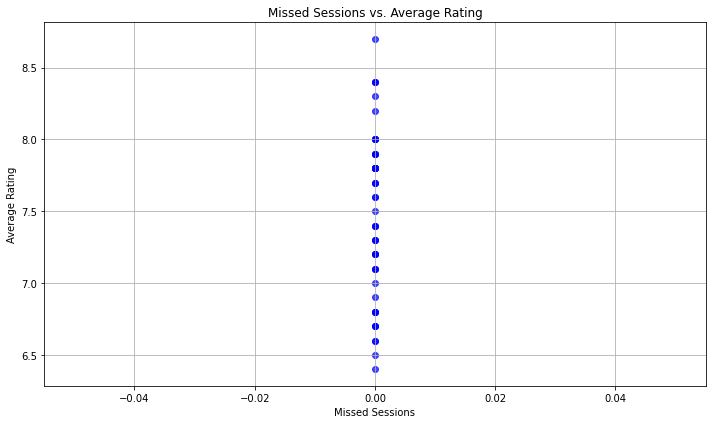

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data from the CSV file
df = pd.read_csv('Batchwise_Attendance_Data_Class_1.csv')

# Calculate missing sessions for each student
date_columns = [col for col in df.columns if col.startswith('R-')]
df['Missed Sessions'] = df[date_columns].apply(lambda row: row.isnull().sum(), axis=1)

# Calculate average rating for each student
rating_columns = [col for col in df.columns if col.startswith('R-')]
df['Rating'] = df[rating_columns].mean(axis=1)

# Create a scatter plot to visualize missed sessions vs. average ratings
plt.figure(figsize=(10, 6))
plt.scatter(df['Missed Sessions'], df['Rating'], color='blue', alpha=0.7)
plt.xlabel('Missed Sessions')
plt.ylabel('Average Rating')
plt.title('Missed Sessions vs. Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


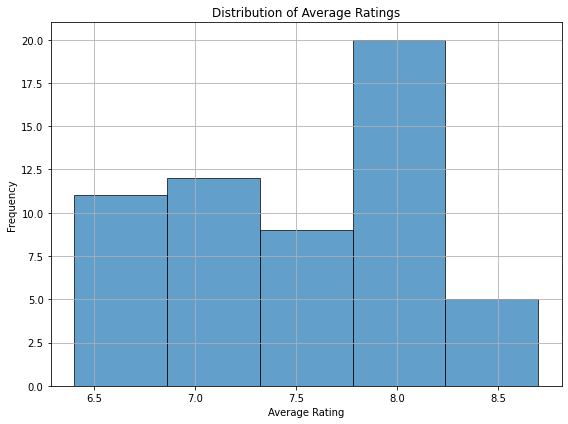

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=5, edgecolor='black', alpha=0.7)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()


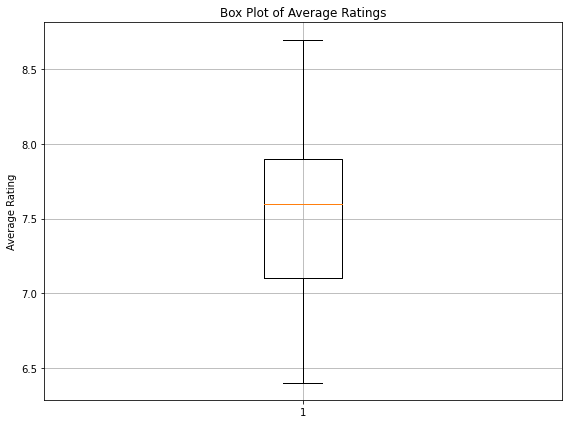

In [7]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Rating'])
plt.ylabel('Average Rating')
plt.title('Box Plot of Average Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()


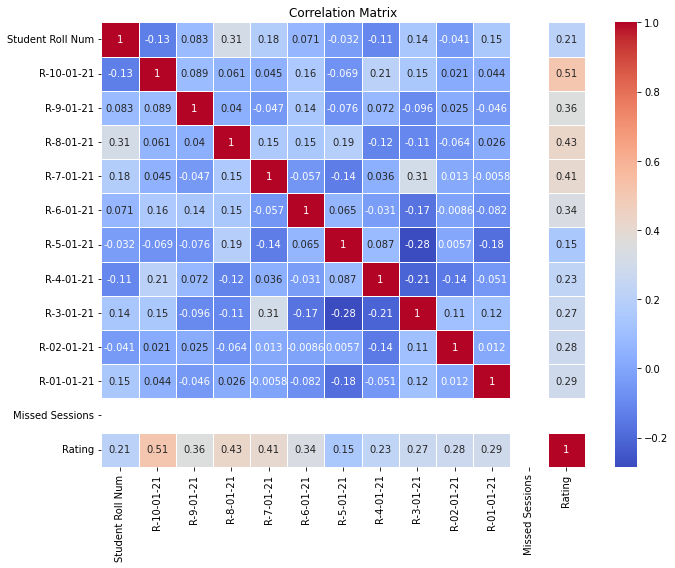

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Load your data
df = pd.read_csv('Batchwise_Attendance_Data_Class_1.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Student Satisfaction Dashboard'),

    # Dropdown component for selecting classes
    dcc.Dropdown(
        id='class-dropdown',
        options=[{'label': cls, 'value': cls} for cls in df['Type'].unique()],
        value=df['Type'].unique()[0],  # Default selected value
    ),

    dcc.Graph(id='student-satisfaction-scatter-plot'),
    dcc.Graph(id='rating-distribution-pie-chart'),
])

# Define callback to update the scatter plot for student satisfaction
@app.callback(
    Output('student-satisfaction-scatter-plot', 'figure'),
    [Input('class-dropdown', 'value')]
)
def update_student_satisfaction_plot(selected_class):
    filtered_data = df[df['Type'] == selected_class]
    student_ratings = filtered_data.filter(regex='^R-\d+-\d+-\d+$', axis=1).mean(axis=1).dropna()

    fig = {
        'data': [{'x': student_ratings.index, 'y': student_ratings.values, 'mode': 'markers', 'type': 'scatter'}],
        'layout': {'title': 'Student Satisfaction Ratings', 'xaxis': {'title': 'Students'}, 'yaxis': {'title': 'Average Rating'}}
    }
    return fig

# Define callback to update the pie chart for rating distribution
@app.callback(
    Output('rating-distribution-pie-chart', 'figure'),
    [Input('class-dropdown', 'value')]
)
def update_rating_distribution_chart(selected_class):
    filtered_data = df[df['Type'] == selected_class]
    ratings = filtered_data.filter(regex='^R-\d+-\d+-\d+$', axis=1).mean().dropna()
    rating_counts = ratings.value_counts().reset_index()
    rating_counts.columns = ['Rating', 'Count']

    fig = px.pie(rating_counts, names='Rating', values='Count', title='Rating Distribution')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True,port = 8056)
